# Raghavendra Deshmukh - 8854506

1. Consider the heart disease dataset in pandas dataframe 

2. Remove outliers using mean,median,Z score. 

3. Convert text columns to numbers using label encoding and one hot encoding 

4. Apply scaling 

5. Build a machine learning classification model using support vector machine. Demonstrate the standalone model as well as Bagging model and include observations about the oerformance 

6. Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance 

7. Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why.

In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from scipy.stats import zscore
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#### 1. Consider the heart disease dataset in pandas dataframe 

In [2]:
heart_df = pd.read_csv("heart.csv")  # Replace "your_dataset.csv" with the actual file path

In [3]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart_df.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
5     39   M           NAP        120          339          0     Normal   
6     45   F           ATA        130          237          0     Normal   
7     54   M           ATA        110          208          0     Normal   
8     37   M           ASY        140          207          0     Normal   
9     48   F           ATA        120          284          0     Normal   
10    37   F           NAP        130          211          0     Normal   
11    58   M           ATA        136          164    

In [6]:
print(heart_df.info)
print(heart_df.shape)

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
5     39   M           NAP        120          339          0     Normal   
6     45   F           ATA        130          237          0     Normal   
7     54   M           ATA        110          208          0     Normal   
8     37   M           ASY        140          207          0     Normal   
9     48   F           ATA        120          284          0     Normal   
10    37   F           NAP        130          211          0     Normal   
11    58   M           ATA        136          164      

In [4]:
# Check if any null values are present
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
print(heart_df['HeartDisease'].value_counts())

1    508
0    410
Name: HeartDisease, dtype: int64


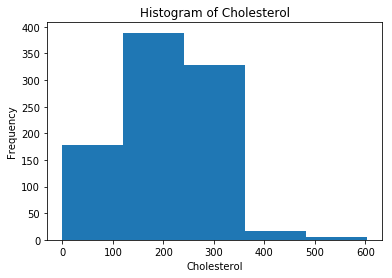

In [6]:
# For example, to plot a histogram of Age column:
import matplotlib.pyplot as plt
plt.hist(heart_df['Cholesterol'], bins=5)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol')
plt.show()

In [7]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

C:\Users\Ragha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


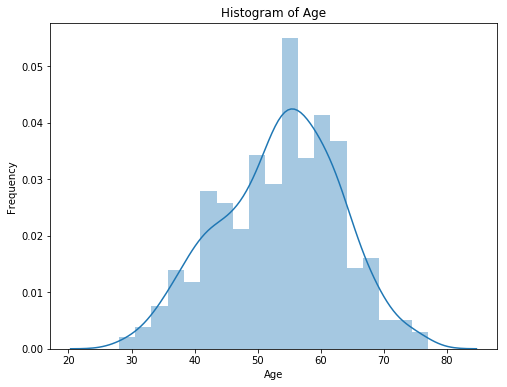

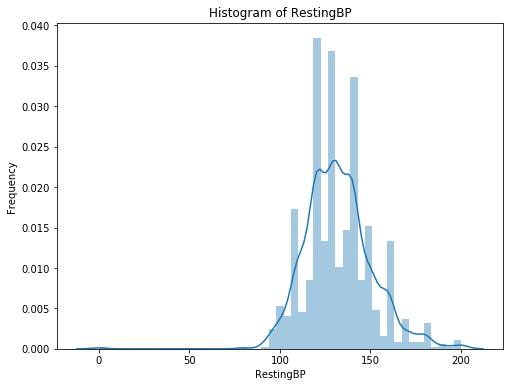

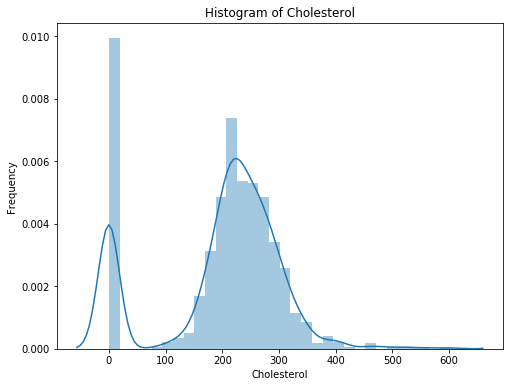

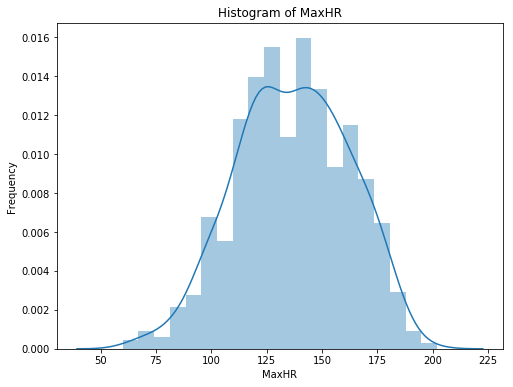

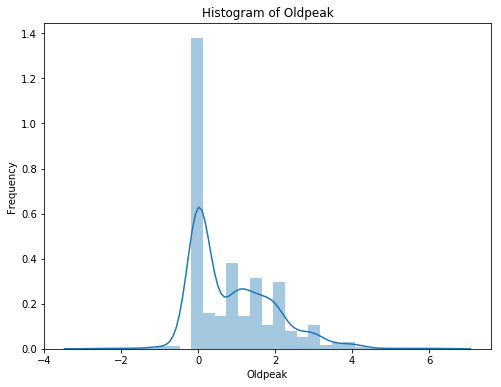

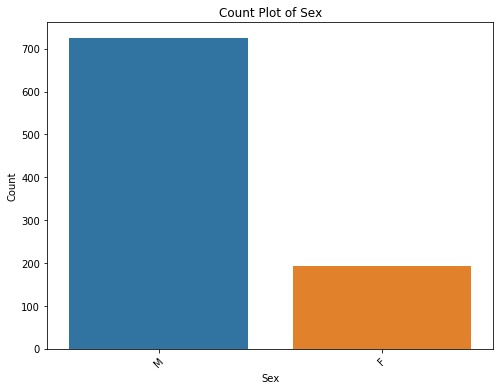

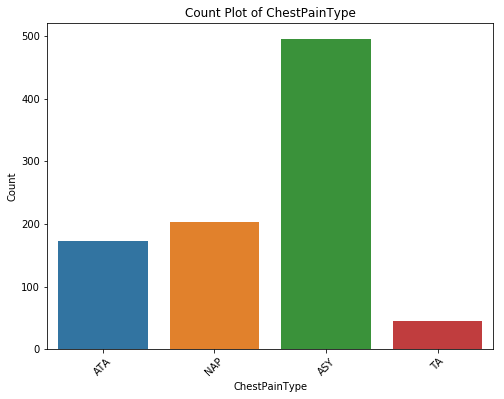

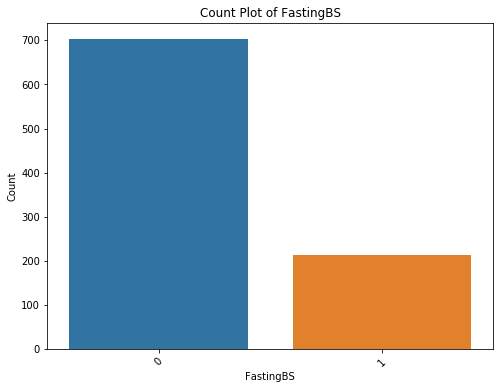

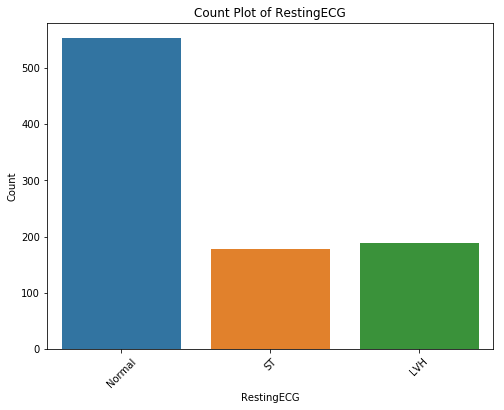

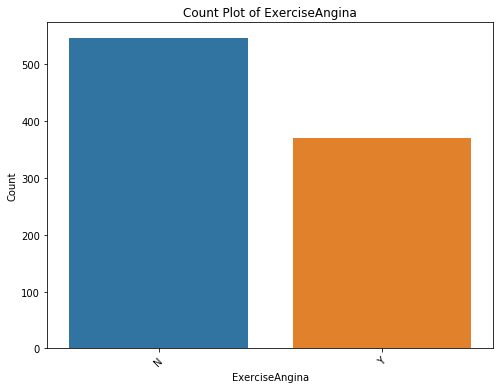

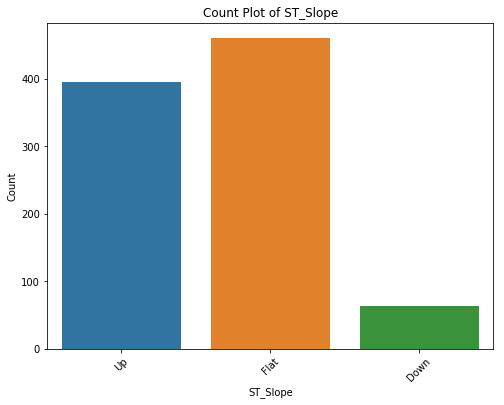

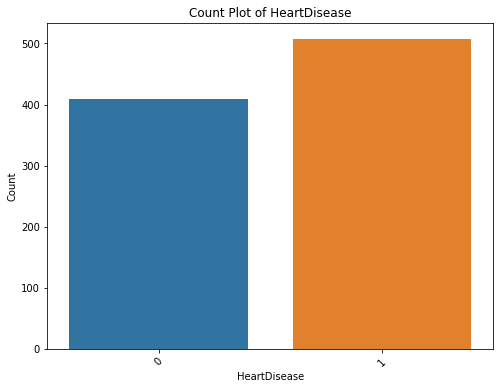

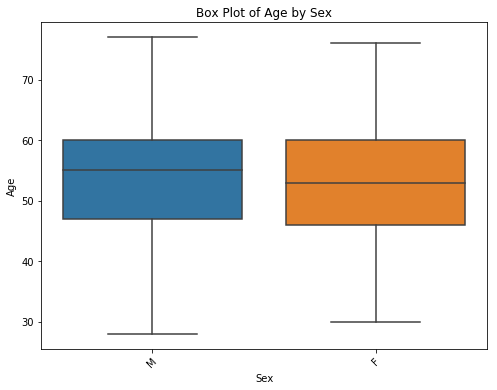

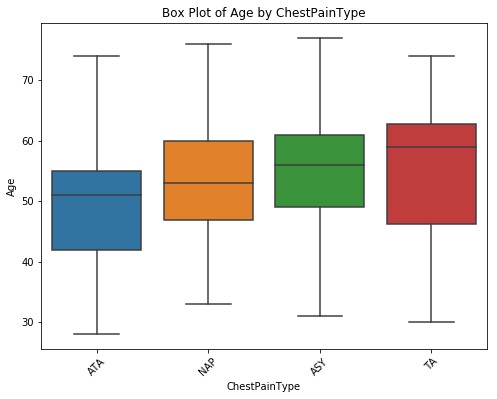

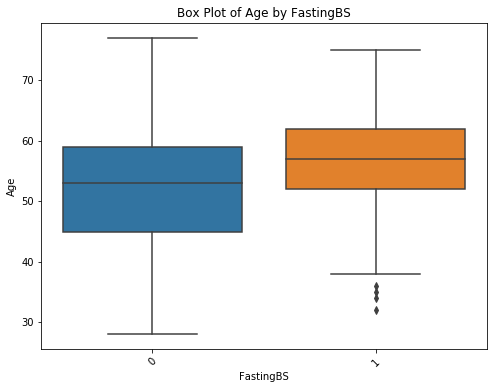

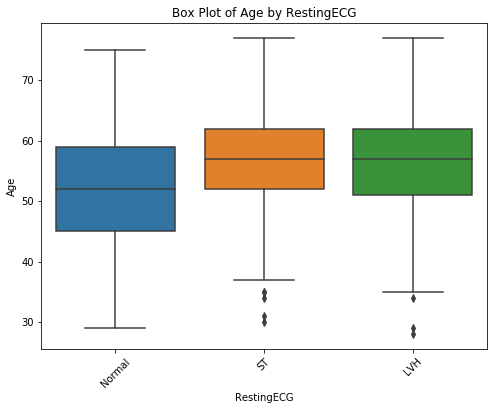

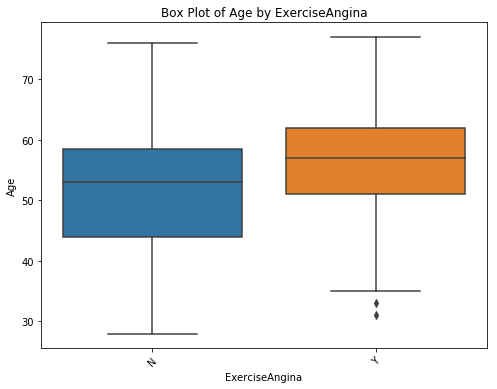

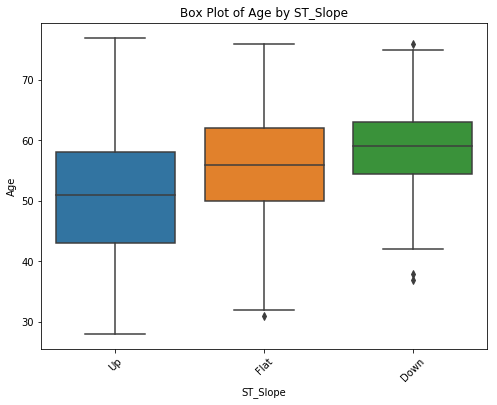

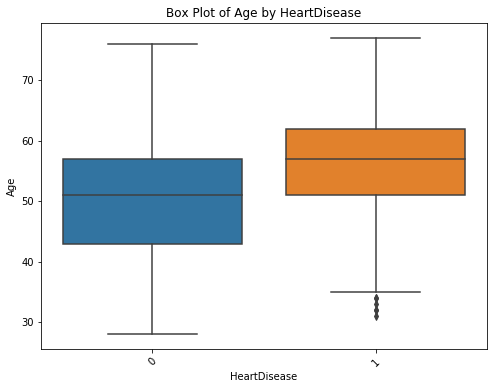

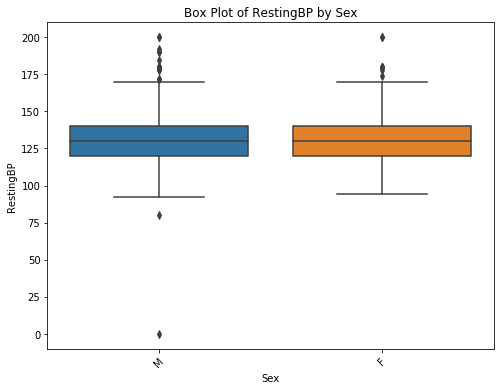

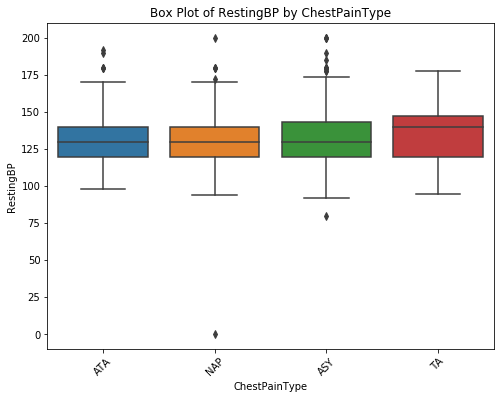

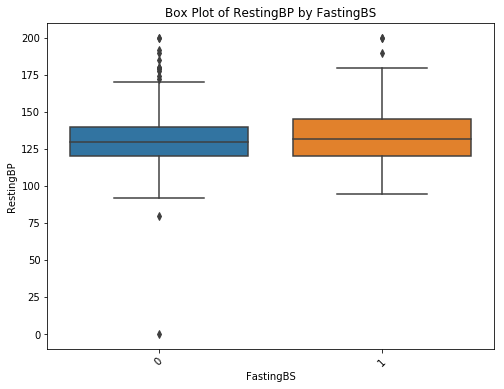

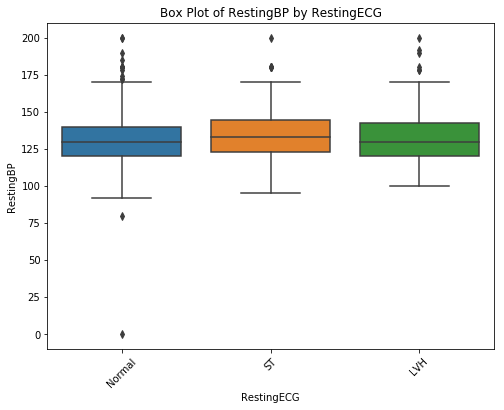

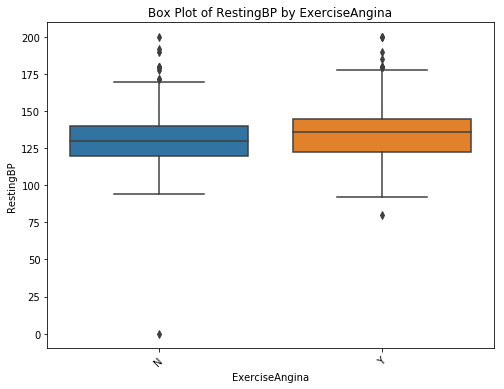

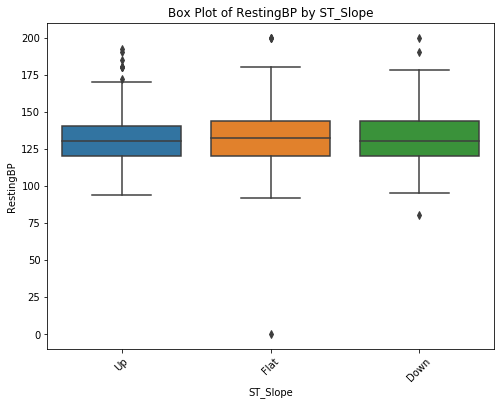

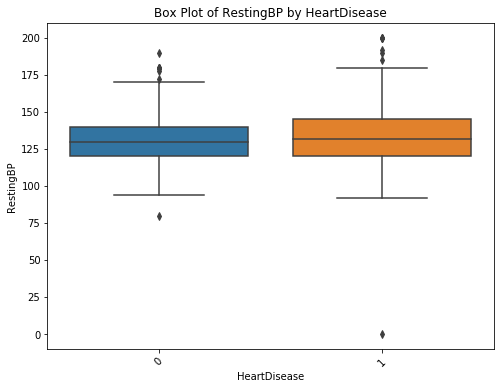

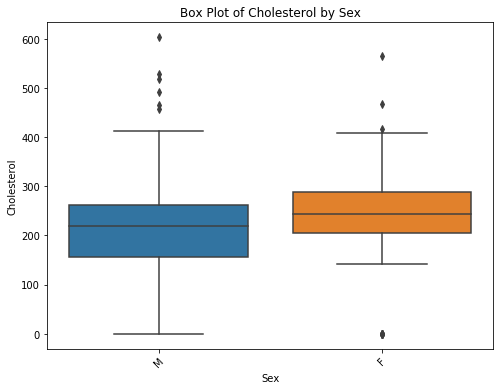

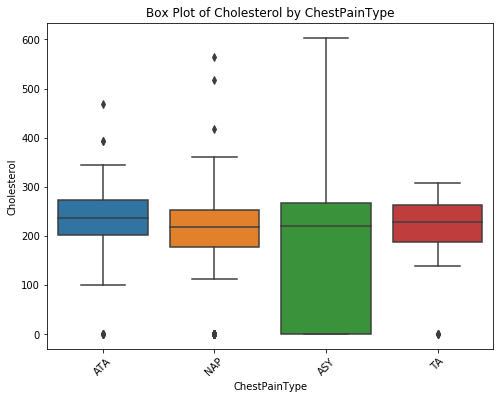

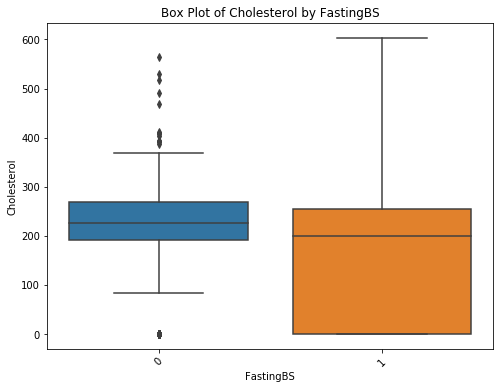

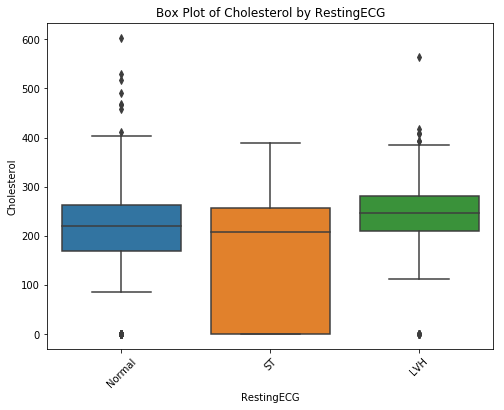

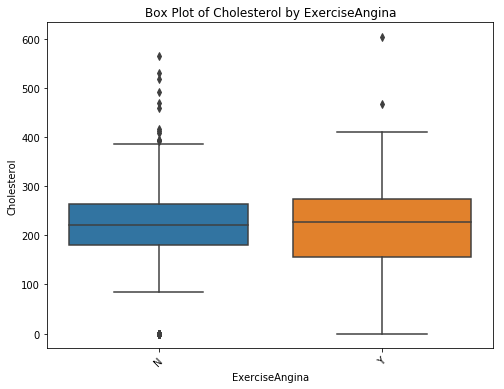

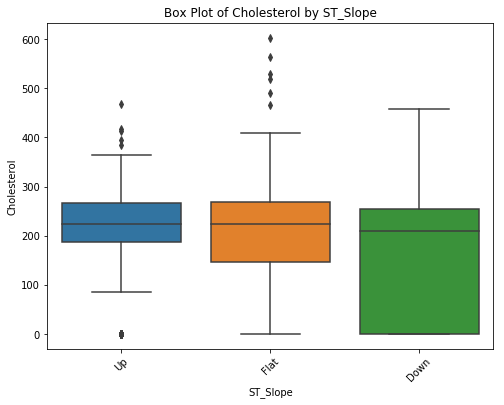

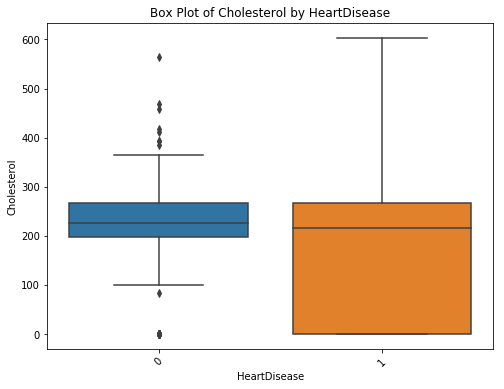

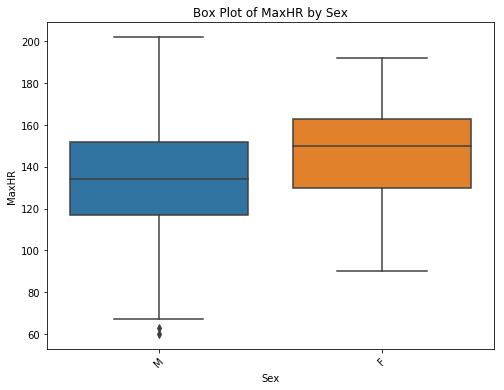

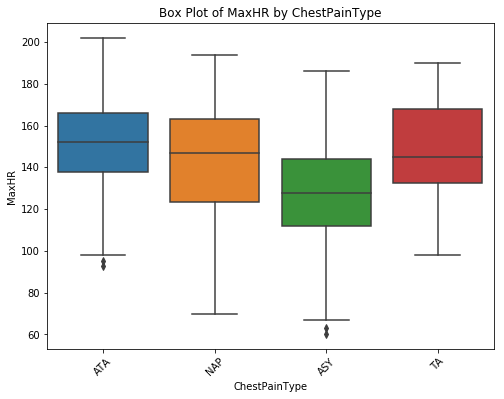

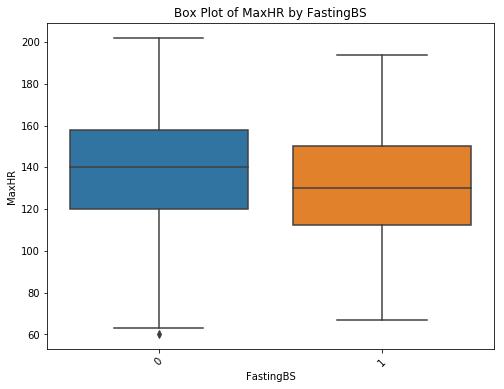

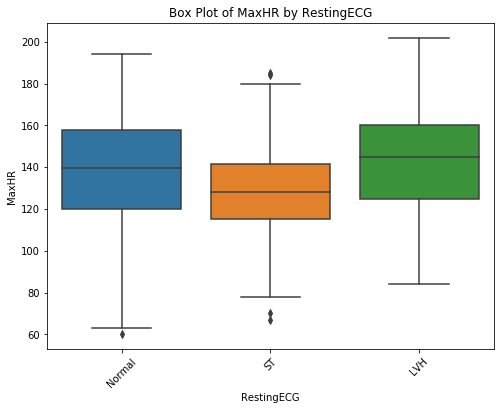

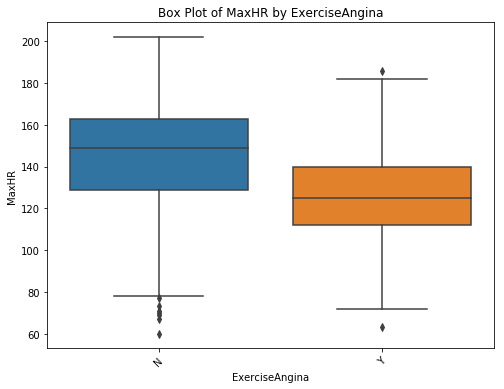

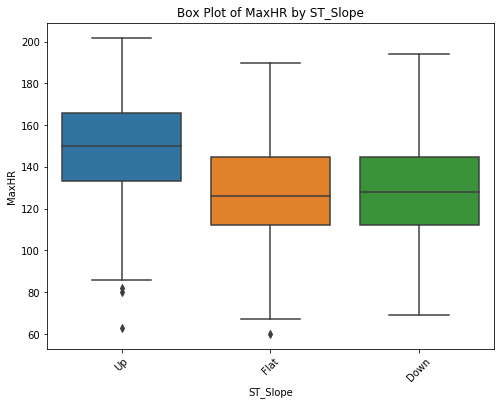

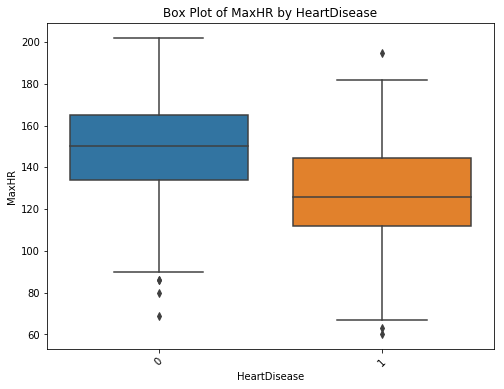

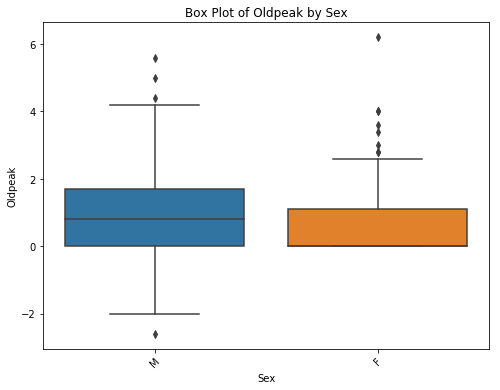

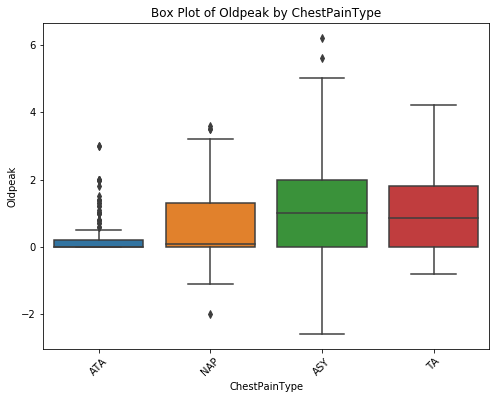

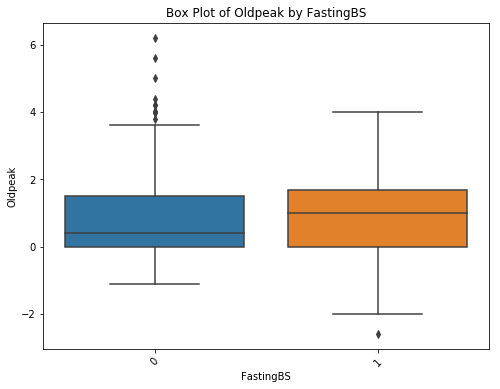

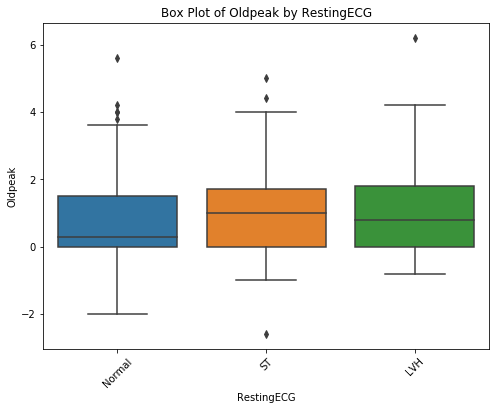

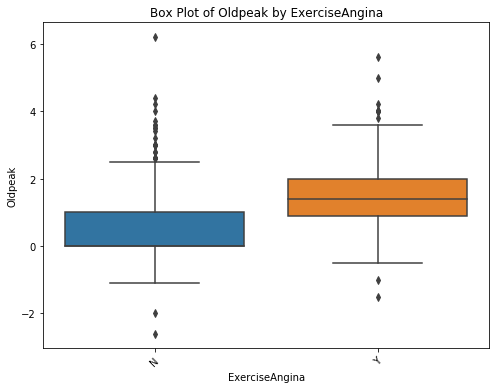

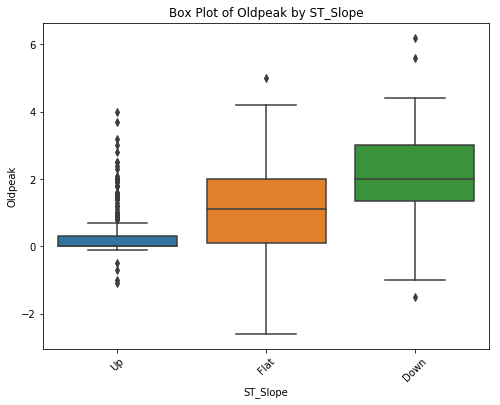

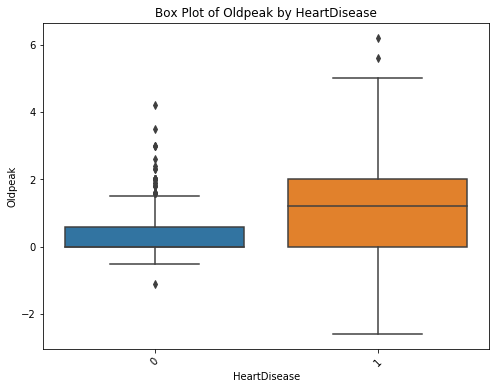

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric columns
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.distplot(heart_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot count plots for categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=heart_df, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# # Plot correlation heatmap
# plt.figure(figsize=(10, 8))
# correlation_matrix = heart_df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

# Plot pair plot for numeric variables
# sns.pairplot(heart_df[numeric_columns])
# plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
# plt.show()

# Plot box plots for numeric variables against categorical variables
for num_column in numeric_columns:
    for cat_column in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=heart_df, x=cat_column, y=num_column)
        plt.title(f'Box Plot of {num_column} by {cat_column}')
        plt.xlabel(cat_column)
        plt.ylabel(num_column)
        plt.xticks(rotation=45)
        plt.show()


In [9]:
# For example, converting categorical columns to numeric using one-hot encoding
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_columns

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

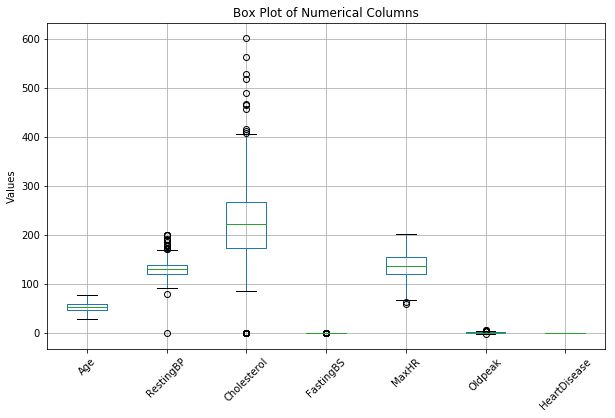

In [10]:
numerical_columns = heart_df.select_dtypes(include='number').columns.tolist()

# Create a box plot for each numerical column
plt.figure(figsize=(10, 6))
heart_df[numerical_columns].boxplot()
plt.title("Box Plot of Numerical Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

#### Remove outliers using mean, median, and Z-score

This valid for the above numeric columns only

In [18]:
# To get the only numeric columns
heart_df.select_dtypes(include=[np.number]).columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

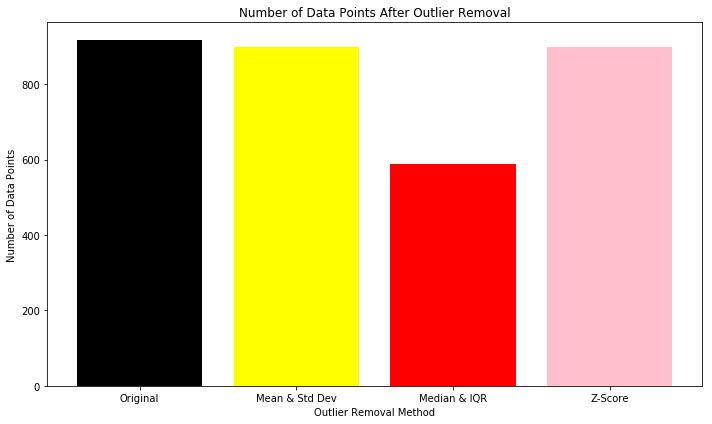

In [23]:
# Method 1: Using Mean and Standard Deviation
heart_df_mean_std = heart_df.copy()
for column in heart_df_mean_std.select_dtypes(include=[np.number]).columns:
    mean = heart_df_mean_std[column].mean()
    std = heart_df_mean_std[column].std()
    heart_df_mean_std = heart_df_mean_std[(heart_df_mean_std[column] >= mean - 3*std) & (heart_df_mean_std[column] <= mean + 3*std)]

# Method 2: Using Median and IQR
heart_df_iqr = heart_df.copy()
for column in heart_df_iqr.select_dtypes(include=[np.number]).columns:
    Q1 = heart_df_iqr[column].quantile(0.25)
    Q3 = heart_df_iqr[column].quantile(0.75)
    IQR = Q3 - Q1
    heart_df_iqr = heart_df_iqr[(heart_df_iqr[column] >= Q1 - 1.5*IQR) & (heart_df_iqr[column] <= Q3 + 1.5*IQR)]

# Method 3: Using Z-Score
heart_df_zscore = heart_df.copy()
z_scores = np.abs(zscore(heart_df_zscore.select_dtypes(include=[np.number])))
heart_df_zscore = heart_df_zscore[(z_scores < 3).all(axis=1)]

methods = ['Original', 'Mean & Std Dev', 'Median & IQR', 'Z-Score']
row_counts = [
    heart_df.shape[0],
    heart_df_mean_std.shape[0],
    heart_df_iqr.shape[0],
    heart_df_zscore.shape[0]
]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(methods, row_counts, color=['black', 'yellow', 'red', 'pink'])
plt.title('Number of Data Points After Outlier Removal')
plt.ylabel('Number of Data Points')
plt.xlabel('Outlier Removal Method')
plt.tight_layout()
plt.show()


   * Original: The dataset's original size before any outlier removal.
   * Mean & Std Dev: Data points retained after removing outliers based on mean and standard deviation.
   * Median & IQR: Data points retained after removing outliers using the median and interquartile range (IQR).
   * Z-Score: Data points retained after removing outliers based on Z-scores.


Based on the graph, the following observations can be made:

- Both the "Mean & Std Dev" and "Z-Score" approaches preserve a nearly identical count of data points, suggesting comparable efficacy.
- The "Median & IQR" method exhibits the highest level of aggressiveness, eliminating the largest proportion of outliers.

#### So I would be considering the Mean & Std Dev dataframe for the model now 

In [24]:
heart_data_df = heart_df_mean_std.copy()

#### 3) Convert text columns to numbers using label encoding and one hot encoding

In [25]:
categorical_columns = heart_data_df.select_dtypes(include=['object']).columns # to get the categorical columns
unique_values = {column: heart_data_df[column].unique() for column in categorical_columns} # to get the unique values

unique_values

{'Sex': array(['M', 'F'], dtype=object),
 'ChestPainType': array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object),
 'RestingECG': array(['Normal', 'ST', 'LVH'], dtype=object),
 'ExerciseAngina': array(['N', 'Y'], dtype=object),
 'ST_Slope': array(['Up', 'Flat', 'Down'], dtype=object)}

For columns with only two unique values (like 'Sex' and 'ExerciseAngina'), we can use label encoding. For columns with more than two unique values, we'll use one hot encoding.

In [26]:
heart_data_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
heart_data_df['Sex'] = le.fit_transform(heart_data_df['Sex'])
heart_data_df['ExerciseAngina'] = le.fit_transform(heart_data_df['ExerciseAngina'])
heart_data_df = pd.get_dummies(heart_data_df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)
heart_data_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1


#### 4) Apply Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

X = heart_data_df.drop("HeartDisease", axis=1)
y = heart_data_df["HeartDisease"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.428154,0.515943,0.465900,0.849636,-0.550362,1.384320,-0.822945,-0.855469,2.063325,-0.534905,-0.22955,0.809702,-0.489898,-0.998888,1.134695
1,-0.475855,-1.938199,1.634714,-0.168122,-0.550362,0.752973,-0.822945,0.137516,-0.484655,1.869492,-0.22955,0.809702,-0.489898,1.001113,-0.881294
2,-1.745588,0.515943,-0.118507,0.793612,-0.550362,-1.535661,-0.822945,-0.855469,2.063325,-0.534905,-0.22955,-1.235023,2.041241,-0.998888,1.134695
3,-0.581666,-1.938199,0.349019,0.149344,-0.550362,-1.141069,1.215148,0.634008,-0.484655,-0.534905,-0.22955,0.809702,-0.489898,1.001113,-0.881294
4,0.053200,0.515943,1.050307,-0.028064,-0.550362,-0.588640,-0.822945,-0.855469,-0.484655,1.869492,-0.22955,0.809702,-0.489898,-0.998888,1.134695


#### 5) Build a machine learning classification model using support vector machine.

In [29]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=38)

X_train.shape, X_test.shape

((629, 15), (270, 15))

In [33]:
svm_model = SVC().fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

print('SVM accuracy:',svm_accuracy)
print('SVM Classification')
print(svm_classification_report)

SVM accuracy: 0.8629629629629629
SVM Classification
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       128
           1       0.84      0.92      0.88       142

    accuracy                           0.86       270
   macro avg       0.87      0.86      0.86       270
weighted avg       0.87      0.86      0.86       270



#### 5.1) Demonstrate the standalone model as well as Bagging model and include observations about the performance

In [38]:
bagging_svm = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)

bagging_svm_predictions = bagging_svm.predict(X_test)

bagging_svm_accuracy = accuracy_score(y_test, bagging_svm_predictions)
bagging_svm_classification_report = classification_report(y_test, bagging_svm_predictions)

print('Bagging classifier with SVM accuracy:',bagging_svm_accuracy)
print('Bagging classifier with SVM Classification')
print(bagging_svm_classification_report)

Bagging classifier with SVM accuracy: 0.8666666666666667
Bagging classifier with SVM Classification
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       128
           1       0.85      0.91      0.88       142

    accuracy                           0.87       270
   macro avg       0.87      0.86      0.87       270
weighted avg       0.87      0.87      0.87       270



The standalone SVM model achieves an accuracy of 86.29%, whereas the Bagging classifier combined with SVM demonstrates a slight enhancement, achieving 86.67% accuracy. Comparable precision values are observed for both models within the two classes. However, the Bagging classifier exhibits improved recall for class 0, rising from 80% in the SVM model to 82%. This signifies that the Bagging classifier excels in correctly identifying true positives for class 0. F1-scores, which strike a balance between precision and recall, exhibit marginal improvements for the Bagging classifier in both classes, implying a more well-rounded performance. In summary, although both models showcase commendable results, the Bagging classifier provides a more equilibrium prediction across classes. The ensemble approach of Bagging enhances generalization, diminishes variance, and potentially boosts performance on unseen data.

#### Now use decision tree classifier.

In [40]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)

print('Decision Tree accuracy:',dt_accuracy)
print('Decision Tree Classification')
print(dt_classification_report)

Decision Tree accuracy: 0.7962962962962963
Decision Tree Classification
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       128
           1       0.78      0.85      0.81       142

    accuracy                           0.80       270
   macro avg       0.80      0.79      0.79       270
weighted avg       0.80      0.80      0.80       270



#### Use standalone model as well as Bagging and check if you notice any difference in performance

In [42]:
bagging_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_dt.fit(X_train, y_train)

bagging_dt_predictions = bagging_dt.predict(X_test)

bagging_dt_accuracy = accuracy_score(y_test, bagging_dt_predictions)
bagging_dt_classification_report = classification_report(y_test, bagging_dt_predictions)

print('Bagging Classifier with Decision Tree accuracy:',bagging_dt_accuracy)
print('Bagging Classifier with Decision Tree Classification')
print(bagging_dt_classification_report)

Bagging Classifier with Decision Tree accuracy: 0.8333333333333334
Bagging Classifier with Decision Tree Classification
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       128
           1       0.83      0.86      0.84       142

    accuracy                           0.83       270
   macro avg       0.83      0.83      0.83       270
weighted avg       0.83      0.83      0.83       270



The standalone Decision Tree model attains an accuracy of 79.62%. When fortified with Bagging, the accuracy experiences an elevation, reaching 82.34%. Precision has slight difference for class 0 in both models 81%(DT) and 84%(Bagging). However, for class 1, there is a noticeable rise from 78% in the standalone model to 83% with Bagging. Conversely, the recall for class 0 icreases from 74% in the standalone model to 80% in the Bagged version. This equilibrium between precision and recall is also reflected in the F1-scores: the standalone model presents a harmonized score for both classes, while Bagging slightly enhances the score for class 0 at the expense of class 1. In summary, the Bagging classifier heightens the overall accuracy and precision of the Decision Tree model for class 1, albeit with a slight compromise on recall. The ensemble technique of Bagging appears to render the model more cautious in its predictions for class 1, reducing false positives while potentially missing some true positives. Fundamentally, Bagging delivers a sturdier model with enhanced generalization capabilities, albeit with minor trade-offs in recall.

Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why

To compare the performance of the SVM and Decision Tree classifiers and determine where it makes the most sense to use Bagging, we'll visualize the accuracies of both standalone models and their Bagging counterparts.

Given the provided results:

   * SVM accuracy: 86.29%
   * Bagging classifier with SVM accuracy: 86.67%
   * Decision Tree accuracy: 79.62%
   * Bagging classifier with Decision Tree accuracy: 83.34%


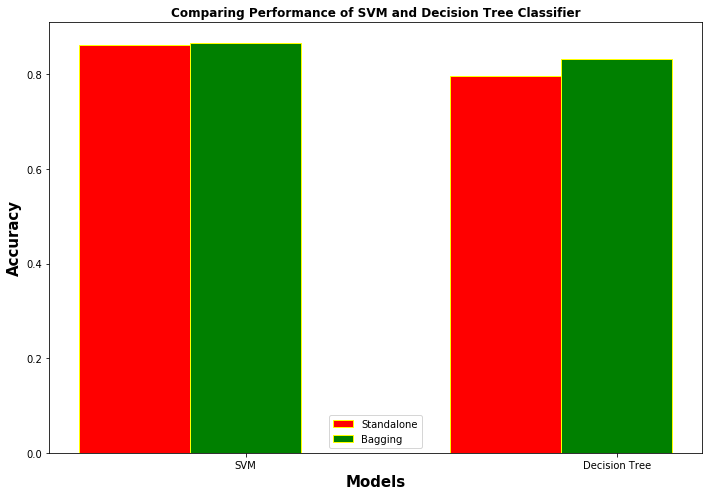

In [47]:
models = ['SVM', 'Decision Tree']
standalone_accuracies = [svm_accuracy, dt_accuracy]
bagging_accuracies = [bagging_svm_accuracy, bagging_dt_accuracy]

barWidth = 0.3
r1 = range(len(standalone_accuracies))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10, 7))
plt.bar(r1, standalone_accuracies, width=barWidth, color='red', edgecolor='yellow', label='Standalone')
plt.bar(r2, bagging_accuracies, width=barWidth, color='green', edgecolor='yellow', label='Bagging')

plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Accuracy', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(standalone_accuracies))], models)
plt.title('Comparing Performance of SVM and Decision Tree Classifier', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

Here's the comparison between SVM and Decision Tree classifiers:

From the graph:

   **SVM:** The Bagging approach offers a modest improvement over the standalone SVM.
   
   **Decision Tree:** Bagging provides a more significant performance boost compared to its standalone counterpart.



**Observations:**

   1. Bagging with SVM: The improvement is marginal. SVM inherently tries to maximize the margin between classes, which can already make it relatively robust to noise or minor variations in data.

   2. Bagging with Decision Trees: The improvement is more pronounced. Decision Trees, being high-variance models, can overfit to their training data. Bagging, which involves creating multiple trees on different subsets of data and averaging out their predictions, reduces this variance and overfitting, leading to better performance.

**Conclusion:** While Bagging enhances the performance for both models, it's particularly beneficial for high-variance models like Decision Trees. If computational resources allow, it makes sense to use Bagging, especially with algorithms that tend to overfit or show high sensitivity to training data.